# Planning a surf trip using IOOS EDS Model Viewer

Created: 2022-11-25

Updated: 2022-12-07

Author: [Mathew Biddle](mailto:mathew.biddle@noaa.gov)

**Resources:**
* EDS IOOS Model Viewer: https://eds.ioos.us/
* EDS IOOS Model Viewer Map: https://eds.ioos.us/map/
* EDS THREDDS Catalog: https://eds.ioos.us/thredds/catalog/catalog.html

Process:
1. Look at significant wave height forecast for MD coast (38.2101 °N 75.0867 °W). Look for significant wave heights >1m or some significant increase to narrow down the investigation. This will get you to a 12-24 hour window, typically.
   * Resources in EDS include:
     * Wave Watch III (WW3) WW3 Wave Hgt @ NOAA WW3 Wave Height https://edsdata.oceansmap.com/thredds/catalog/EDS/NOGAPS/catalog.html
     * GFS-Wave WW3 Atlantic Height @ NOAA GFS-Wave Atlantic Wave Height https://eds.ioos.us/thredds/catalog/ioos/gfswave/global/catalog.html
     * The Nearshore Wave Prediction System (NWPS) Chesapeake NWPS AKQ Wave Hgt @ NOAA NWPS Chesapeake Wave Height - https://eds.ioos.us/thredds/catalog/ioos/nwps/akq/catalog.html
     * Best GFS Wave Atlantic Ocean 16km Time Series - https://eds.ioos.us/thredds/dodsC/ioos/gfswave/atlocn/Best, https://eds.ioos.us/thredds/catalog/ioos/gfswave/atlocn/catalog.html?dataset=ioos/gfswave/atlocn/Best
     * For further South: SWAN model simulation for Puerto Rico and the US Virgin Islands - https://edsdata.oceansmap.com/thredds/catalog/EDS/CARIB_SWAN/catalog.html
1. Once you find a blip in wave heights, take a look at concurrent wave periods to see if it's just a storm or an offshore swell. Typically periods >5 seconds is a good start. That should get you down to a 12 hour window where it might be decent.
1. Next look at the forecasted wave direction and wind direction/speed. Lots of nuances in these two pieces as wind direction could be bad (onshore) but if speeds are low it could be alright. If wind direction good (offshore) but winds are strong, could be tricky. wave direction informs which spots would catch the swell. Not many features on MD coast (barrier island), so direction not as important. This should get you to a 6 hour'ish window.
1. Finally, look at tides and water temp (wetsuit or trunks?), sunrise, sunset times. Use https://erddap.sensors.ioos.us/erddap/index.html
1. Run this process every hour leading up to the event - forecast will get more accurate the closer to the event. I will start looking at real-time buoy obs ~12 hours before the event.

# Set up coordinates and time range for forecast

In [1]:
import datetime

lat = 38.2101
lon = -75.0867 

lon360 = 360+lon # convert to degrees_east 0-360

print('lat: {}\nlon: {}\nlon360: {}'.format(lat,lon,lon360))

time_min = datetime.datetime.strftime(datetime.datetime.today()-datetime.timedelta(days=1), '%Y-%m-%d')
time_max = datetime.datetime.strftime(datetime.datetime.today()+datetime.timedelta(days=7), '%Y-%m-%d')

time = slice(time_min, time_max)

print(time)

lat: 38.2101
lon: -75.0867
lon360: 284.9133
slice('2024-08-19', '2024-08-27', None)


## Put coordinates on a map

Text(0.5, 1.0, 'lon:-75.0867 lat:38.2101')

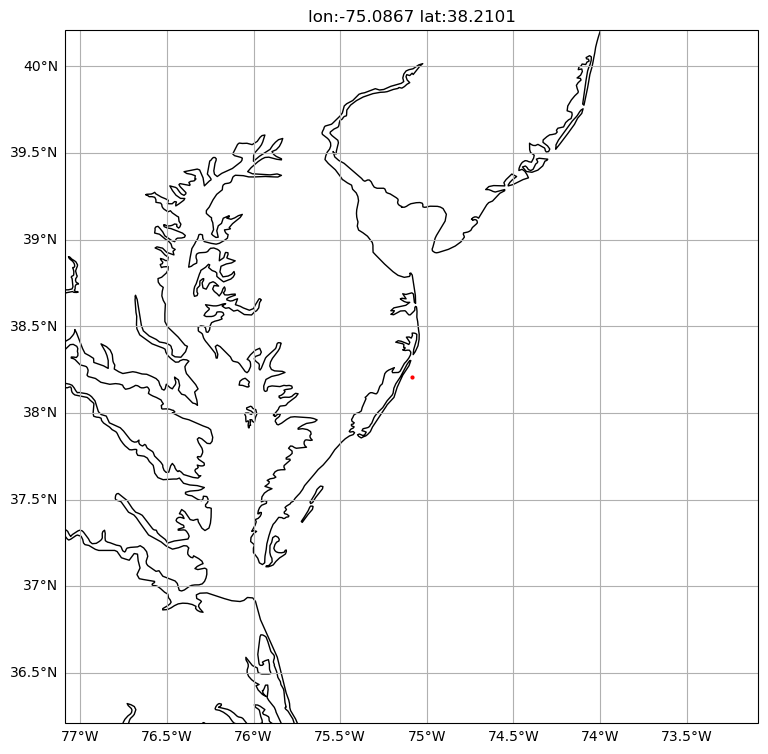

In [2]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

projection=ccrs.PlateCarree() 
figsize=(9, 9)

title='lon:{} lat:{}'.format(lon,lat)

fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
gl = ax.gridlines(draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.plot(lon, lat, markersize=2, marker='o', color='red')

ax.set_extent([lon-2, lon+2, lat-2, lat+2], ccrs.PlateCarree())

ax.coastlines("10m")

plt.title(title)

# GFS WW3

![image.png](gfs_surf_screenshot.png)

https://eds.ioos.us/thredds/catalog/ioos/gfswave/global/catalog.html

Just use xarray to open dataset directly.

In [3]:
#import cf_xarray
import xarray as xr

In [4]:
%%time
import datetime

url = 'https://tds.ioos.us/thredds/dodsC/ioos/gfswave/global/Best'

ds = xr.open_dataset(url)

wvhgt_gfs = ds.filter_by_attrs(abbreviation='HTSGW').sel(lat=lat, lon=lon360, method="nearest").sel(time=time)

wvhgt_gfs

CPU times: total: 172 ms
Wall time: 530 ms


<xarray.Dataset>
Dimensions:                                                      (time: 168)
Coordinates:
    lat                                                          float32 38.25
    lon                                                          float32 285.0
  * time                                                         (time) datetime64[ns] ...
    reftime                                                      (time) datetime64[ns] ...
Data variables:
    Significant_height_of_combined_wind_waves_and_swell_surface  (time) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    file_format:                                                             ...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    _CoordSysBuilder:                                                        ...

CPU times: total: 62.5 ms
Wall time: 1min 50s


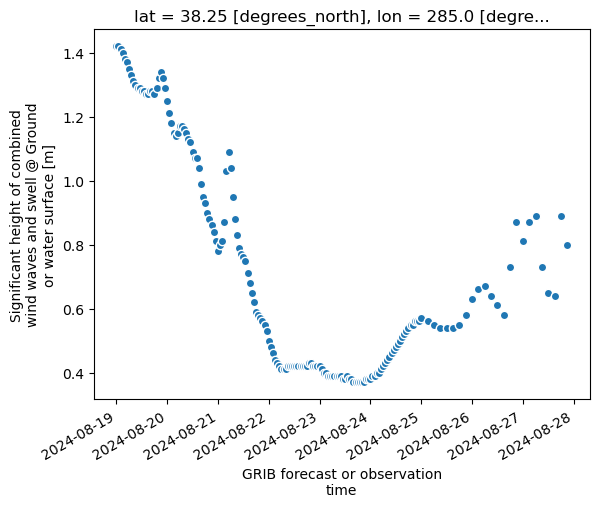

In [5]:
%%time
wvhgt_gfs.plot.scatter(x='time',y=list(wvhgt_gfs.data_vars)[0])

# NOAA WW3

In [6]:
# %%time
# import datetime

# today = datetime.datetime.now().strftime('%Y%m%d')

# #url = 'http://edsdata.oceansmap.com/thredds/dodsC/EDS/NOGAPS/WW3_WAVE_HGT{}.nc'.format(today)

# url = 'http://edsdata.oceansmap.com/thredds/dodsC/EDS/WW3_ATL_4M/WW3_ATL_4M_best.ncd'

# ds = xr.open_dataset(url)

# wvhgt_noaa = ds.filter_by_attrs(abbreviation='HTSGW').sel(lat=lat, lon=lon360, method="nearest")

# wvhgt_noaa

Save data as data frame.

In [7]:
# %%time
# df_noaa = wvhgt_noaa.to_dataframe()

In [8]:
# %%time
# df_noaa.plot.scatter(x='time', y=list(wvhgt_noaa.data_vars)[0])

# Nearshore Wave Prediction System (NWPS) Chesapeake NWPS AKQ Wave Hgt

In [9]:
%%time
#url = 'https://eds.ioos.us/thredds/dodsC/ioos/nwps/akq/NWPS_AKQ-2022-11-28/LatLon_229X153-37p66N-75p76W'

url = 'https://tds.ioos.us/thredds/dodsC/ioos/nwps/akq/Best/LatLon_229X153-37p66N-75p76W-3'

ds = xr.open_dataset(url)

wvhgt_nwps = ds.filter_by_attrs(abbreviation='HTSGW').sel(lat=lat, lon=lon360, method="nearest").sel(time=time)

wvhgt_nwps

CPU times: total: 15.6 ms
Wall time: 124 ms


<xarray.Dataset>
Dimensions:                                                      (time: 169)
Coordinates:
    lat                                                          float32 38.22
    lon                                                          float32 284.9
  * time                                                         (time) datetime64[ns] ...
    reftime                                                      (time) datetime64[ns] ...
Data variables:
    Significant_height_of_combined_wind_waves_and_swell_surface  (time) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    file_format:                                                             ...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    _CoordSysBuilder:                                                        ...

Now, let's plot those data.

CPU times: total: 46.9 ms
Wall time: 4.11 s


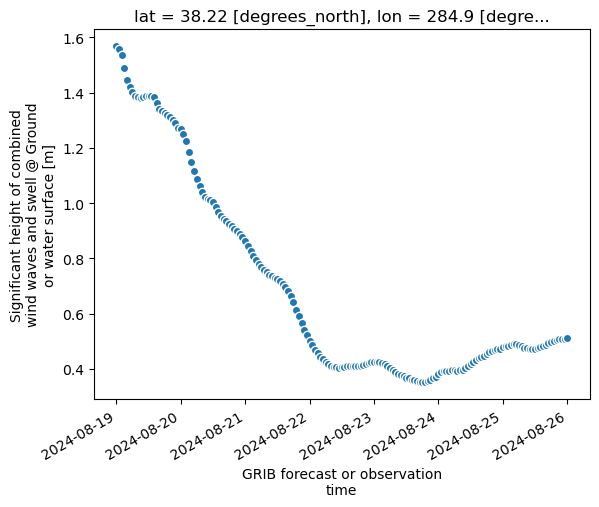

In [10]:
%%time
wvhgt_nwps.plot.scatter(x='time', y=list(wvhgt_nwps.data_vars)[0])

#print("Reference time {}".format(wvhgt_nwps['reftime'].values))

# Best GFS Wave Atlantic Ocean 16km

In [11]:
%%time

url = 'https://tds.ioos.us/thredds/dodsC/ioos/gfswave/atlocn/Best'

ds = xr.open_dataset(url)

wvhgt_gfsatlocn = ds.filter_by_attrs(abbreviation='HTSGW').sel(lat=lat, lon=lon360, method="nearest").sel(time=time)

wvhgt_gfsatlocn

CPU times: total: 15.6 ms
Wall time: 153 ms


<xarray.Dataset>
Dimensions:                                                      (time: 168)
Coordinates:
    lat                                                          float32 38.17
    lon                                                          float32 284.8
  * time                                                         (time) datetime64[ns] ...
    reftime                                                      (time) datetime64[ns] ...
Data variables:
    Significant_height_of_combined_wind_waves_and_swell_surface  (time) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    file_format:                                                             ...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    _CoordSysBuilder:                                                        ...

CPU times: total: 46.9 ms
Wall time: 37.7 s


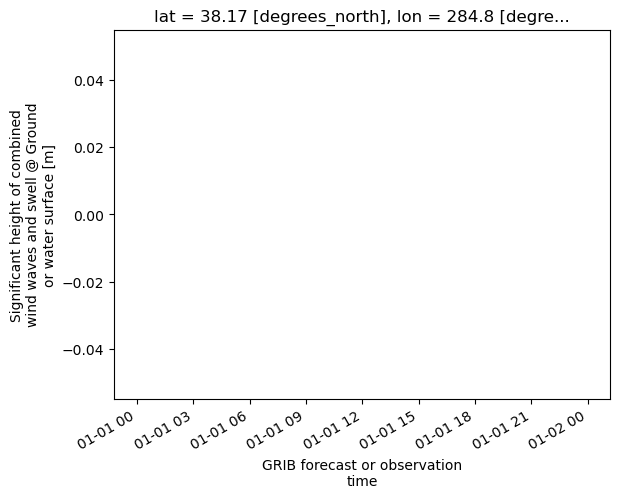

In [12]:
%%time
wvhgt_gfsatlocn.plot.scatter(x='time',y=list(wvhgt_gfsatlocn.data_vars)[0])

# Combine them all together in one plot

CPU times: total: 62.5 ms
Wall time: 30.1 s


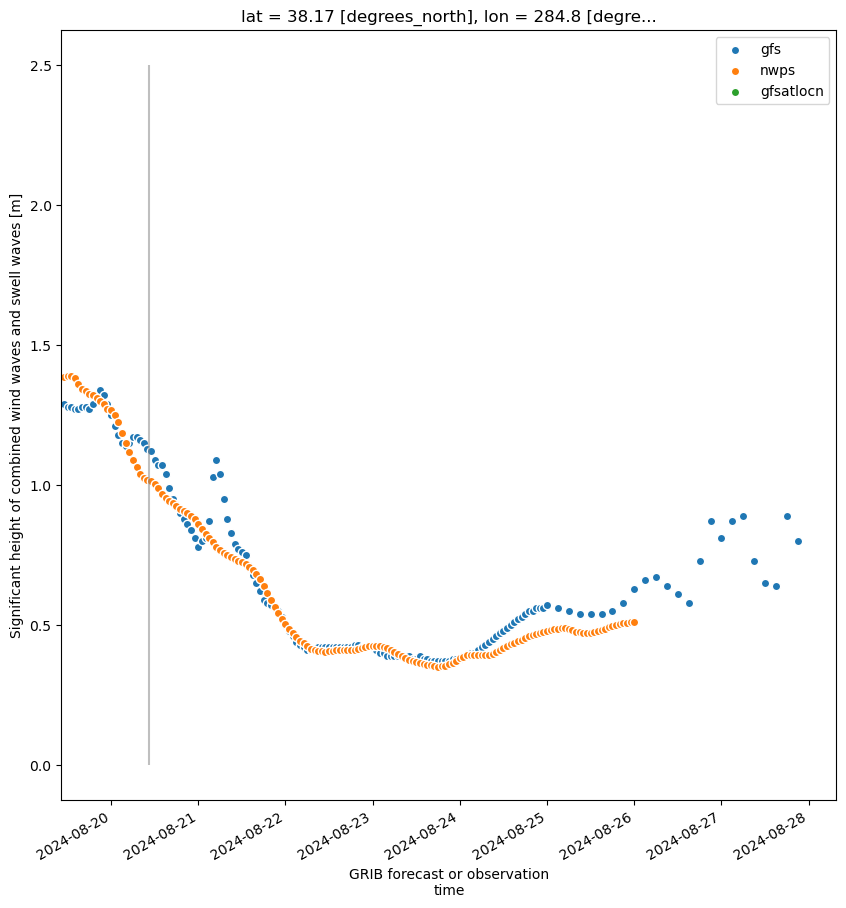

In [13]:
%%time
import matplotlib.pyplot as plt
import datetime

# initialize figure
fig, ax = plt.subplots(figsize=(10, 10))

# add scatter plots
wvhgt_gfs.plot.scatter(x='time', y=list(wvhgt_gfs.data_vars)[0], ax=ax, label='gfs')
#wvhgt_noaa.plot.scatter(x='time', y=list(wvhgt_noaa.data_vars)[0], ax=ax, label='noaa ww3')
wvhgt_nwps.plot.scatter(x='time', y=list(wvhgt_nwps.data_vars)[0], ax=ax, label='nwps')
wvhgt_gfsatlocn.plot.scatter(x='time', y=list(wvhgt_gfsatlocn.data_vars)[0], ax=ax, label='gfsatlocn')

# add legend
ax.legend()

# set limits
ax.set_xlim(left = datetime.datetime.today()-datetime.timedelta(days=1) )

ax.set_ylabel('Significant height of combined wind waves and swell waves [m]')

# add a line for right now
ax.vlines(datetime.datetime.today(),ymin=0,ymax=2.5,color='grey', alpha=0.5)

In [14]:
# try saving to array above, then combining all into one plot?

# Run all of it in one cell.

lat: 38.2101
lon: -75.0867
lon360: 284.9133
time range: slice('2024-08-19', '2024-08-27', None)
Getting data from https://tds.ioos.us/thredds/dodsC/ioos/gfswave/atlocn/Best
Getting data from https://tds.ioos.us/thredds/dodsC/ioos/nwps/akq/Best/LatLon_229X153-37p66N-75p76W-3
Getting data from https://tds.ioos.us/thredds/dodsC/ioos/gfswave/global/Best
CPU times: total: 172 ms
Wall time: 465 ms


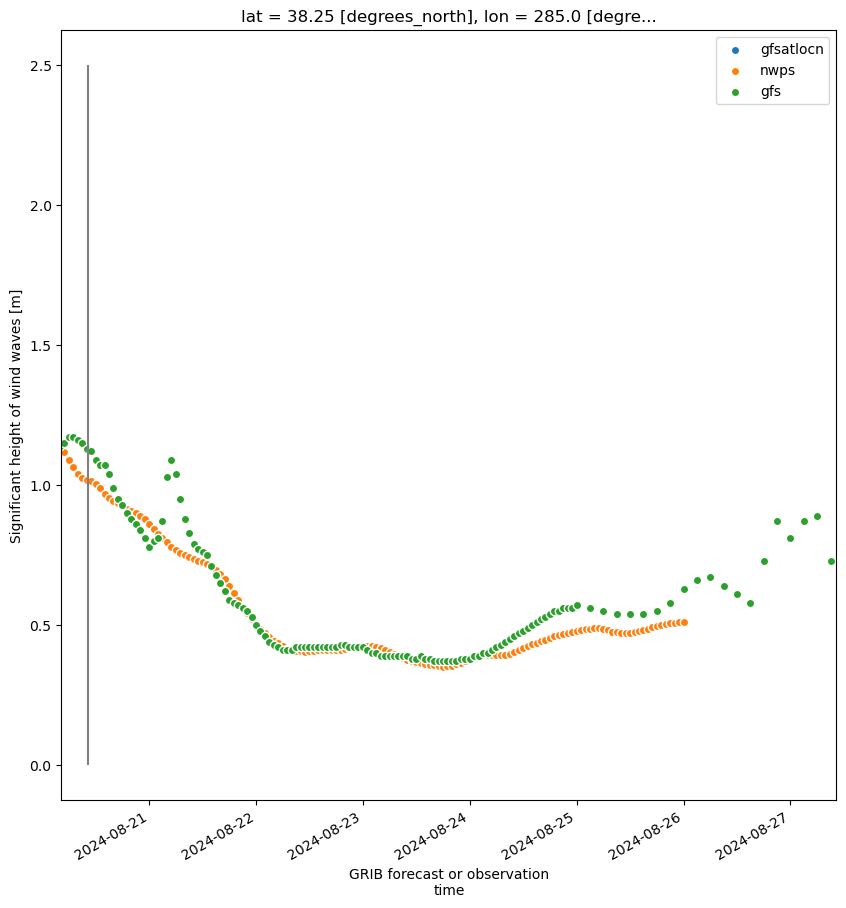

In [15]:
%%time

import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import datetime

lat = 38.2101
lon = -75.0867 

lon360 = 360+lon # convert to degrees_east 0-360

print('lat: {}\nlon: {}\nlon360: {}'.format(lat,lon,lon360))

time_min = datetime.datetime.strftime(datetime.datetime.today()-datetime.timedelta(days=1), '%Y-%m-%d')
time_max = datetime.datetime.strftime(datetime.datetime.today()+datetime.timedelta(days=7), '%Y-%m-%d')

time = slice(time_min, time_max)

print('time range: {}'.format(time))

# initialize figure
fig, ax = plt.subplots(figsize=(10, 10))

urls = {'gfsatlocn': 'https://tds.ioos.us/thredds/dodsC/ioos/gfswave/atlocn/Best',
       'nwps': 'https://tds.ioos.us/thredds/dodsC/ioos/nwps/akq/Best/LatLon_229X153-37p66N-75p76W-3',
       #'noaa': 'http://edsdata.oceansmap.com/thredds/dodsC/EDS/WW3_ATL_4M/WW3_ATL_4M_best.ncd',
       'gfs': 'https://tds.ioos.us/thredds/dodsC/ioos/gfswave/global/Best'
       }

# initialize output dataframe
df_out = pd.DataFrame({'time':[]})

for key in urls.keys():
    
    print('Getting data from {}'.format(urls[key]))
    
    ds = xr.open_dataset(urls[key])
    #'HTSGW'
    data = ds.filter_by_attrs(abbreviation='HTSGW').sel(lat=lat, lon=lon360, method="nearest").sel(time=time)
    #PERPW = ds.filter_by_attrs(abbreviation='PERPW').sel(lat=lat, lon=lon360, method="nearest")
    
#     if key == 'nwps':
#         HTSGW = HTSGW.isel(reftime=1).squeeze()
    df = data.to_dataframe().reset_index()
    #df['model'] = key
    suffix='_{}'.format(key)
    df_out = pd.merge_ordered(left=df, right=df_out, on='time', suffixes=[suffix,None])
    
    data.plot.scatter(x='time', y=list(data.data_vars)[0], ax=ax, label=key)
   
    
# add legend
ax.legend()

xmin = datetime.datetime.today()-datetime.timedelta(hours=6)
xmax = datetime.datetime.today()+datetime.timedelta(days=7)

# set limits
ax.set_xlim([xmin, xmax] )

ax.set_ylabel('Significant height of wind waves [m]')

# add a line for right now
ax.vlines(datetime.datetime.today(),ymin=0,ymax=2.5,color='grey')

<Axes: xlabel='time'>

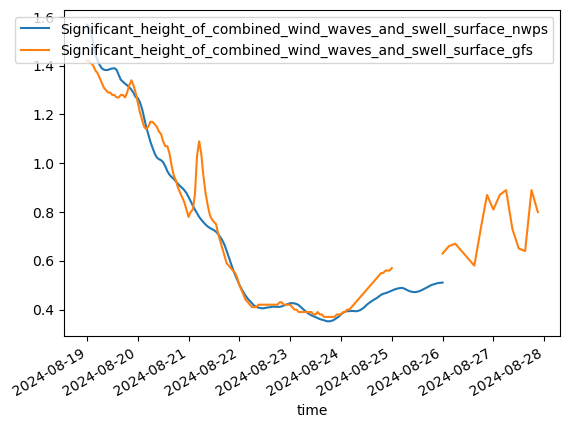

In [16]:
df_out.plot('time',['Significant_height_of_combined_wind_waves_and_swell_surface_nwps','Significant_height_of_combined_wind_waves_and_swell_surface_gfs'])

Look at IOOS Sensor Map ERDDAP for stations in our area with appropriate data.

In [18]:
from erddapy import ERDDAP
import pandas as pd
#import time

server = "https://erddap.sensors.ioos.us/erddap/"

e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="csv",
)

kw = {
    "standard_name": "sea_surface_wave_significant_height",
    "min_lon": float(lon-1),
    "max_lon": float(lon+1),
    "min_lat": float(lat-1),
    "max_lat": float(lat+1),
    "min_time": "now-1day",
    "max_time": "now",
    #"cdm_data_type": "trajectoryprofile",
}


search_url = e.get_search_url(response="csv", **kw)

stations = pd.read_csv(search_url)

stations

C:\Users\Mathew.Biddle\programs\Miniforge\envs\IOOS\Lib\site-packages\trio\_core\_multierror.py:406: RuntimeWarning: IPython detected, but you already have a custom exception handler installed. I'll skip installing Trio's custom handler, but this means exception groups will not show full tracebacks.
  warnings.warn(


,griddap,Subset,tabledap,Make A Graph,wms,files,Title,Summary,FGDC,ISO 19115,Info,Background Info,RSS,Email,Institution,Dataset ID
0,NaN,NaN,https://erddap.sensors.ioos.us/erddap/tabledap...,https://erddap.sensors.ioos.us/erddap/tabledap...,NaN,NaN,"224 - Wallops Island, VA (44089)","Timeseries data from '224 - Wallops Island, VA...",https://erddap.sensors.ioos.us/erddap/metadata...,https://erddap.sensors.ioos.us/erddap/metadata...,https://erddap.sensors.ioos.us/erddap/info/edu...,https://sensors.ioos.us/#metadata/130264/station,http://erddap.sensors.ioos.us/erddap/rss/edu_u...,https://erddap.sensors.ioos.us/erddap/subscrip...,Coastal Data Information Program (CDIP),edu_ucsd_cdip_224
1,NaN,NaN,https://erddap.sensors.ioos.us/erddap/tabledap...,https://erddap.sensors.ioos.us/erddap/tabledap...,NaN,NaN,"263 - Bethany Beach, DE (44084)","Timeseries data from '263 - Bethany Beach, DE ...",https://erddap.sensors.ioos.us/erddap/metadata...,https://erddap.sensors.ioos.us/erddap/metadata...,https://erddap.sensors.ioos.us/erddap/info/edu...,https://sensors.ioos.us/#metadata/127432/station,http://erddap.sensors.ioos.us/erddap/rss/edu_u...,https://erddap.sensors.ioos.us/erddap/subscrip...,Coastal Data Information Program (CDIP),edu_ucsd_cdip_263
2,NaN,NaN,https://erddap.sensors.ioos.us/erddap/tabledap...,https://erddap.sensors.ioos.us/erddap/tabledap...,NaN,NaN,44009 (LLNR 168) - DELAWARE BAY 26 NM Southeas...,Timeseries data from '44009 (LLNR 168) - DELAW...,https://erddap.sensors.ioos.us/erddap/metadata...,https://erddap.sensors.ioos.us/erddap/metadata...,https://erddap.sensors.ioos.us/erddap/info/gov...,https://sensors.ioos.us/#metadata/130602/station,http://erddap.sensors.ioos.us/erddap/rss/gov-n...,https://erddap.sensors.ioos.us/erddap/subscrip...,NOAA National Data Buoy Center (NDBC),gov-ndbc-44009


In [19]:
dataset_ids = stations['Dataset ID']

dfs= {}

def request_station(dataset_ids):
    for dataset_id in dataset_ids:
        e.dataset_id = dataset_id
        
        e.variables = ["time", 
                       "longitude", 
                       "latitude", 
                       "sea_surface_wave_significant_height", 
                       "sea_surface_wave_mean_period",
                      ]
        
        e.constraints = {
            "time>=": "now-2days",
            "time<": "now",
        }
        
        df = e.to_pandas().dropna()
    
        dfs[dataset_id] = df
    
    return (dfs)

dfs = request_station(dataset_ids)

Make a map of the stations we found in our search.

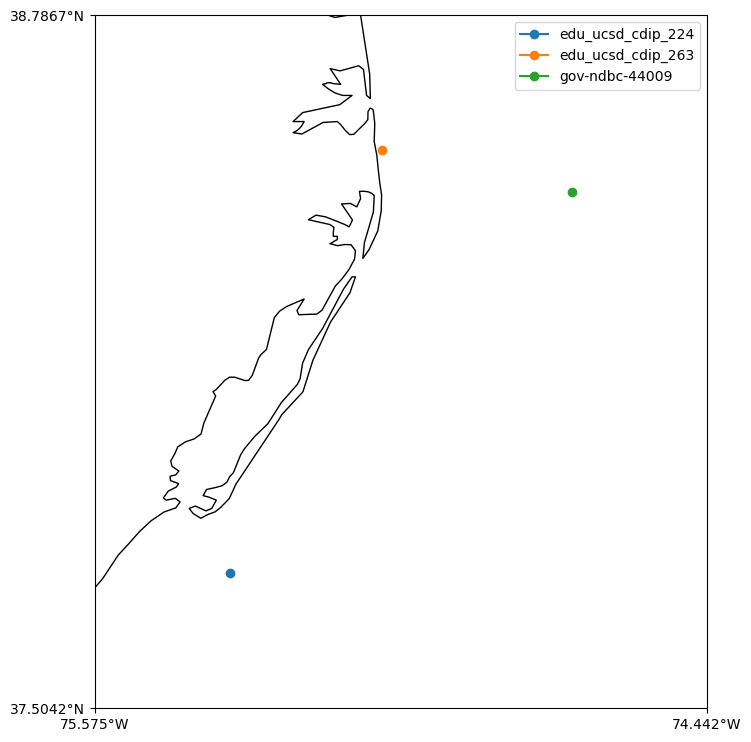

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


def make_map():
    fig, ax = plt.subplots(
        figsize=(9, 9),
        subplot_kw=dict(projection=ccrs.PlateCarree())
    )
    ax.coastlines(resolution="10m")
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    return fig, ax


fig, ax = make_map()
lons, lats = [], []
for station, df in dfs.items():
    lon, lat = df["longitude (degrees_east)"].unique(), df["latitude (degrees_north)"].unique()
    lons.extend(lon)
    lats.extend(lat)
    ax.plot(lon, lat, marker='o', label=station)

dx = dy = 0.25
extent = min(lons)-dx, max(lons)+dx, min(lats)-dy, max(lats)+dy
ax.set_extent(extent)

ax.set_xticks([extent[0], extent[1]], crs=ccrs.PlateCarree())
ax.set_yticks([extent[2], extent[3]], crs=ccrs.PlateCarree());
ax.legend()

Let's look at the last day of observations for those stations.

CPU times: total: 46.9 ms
Wall time: 44 ms


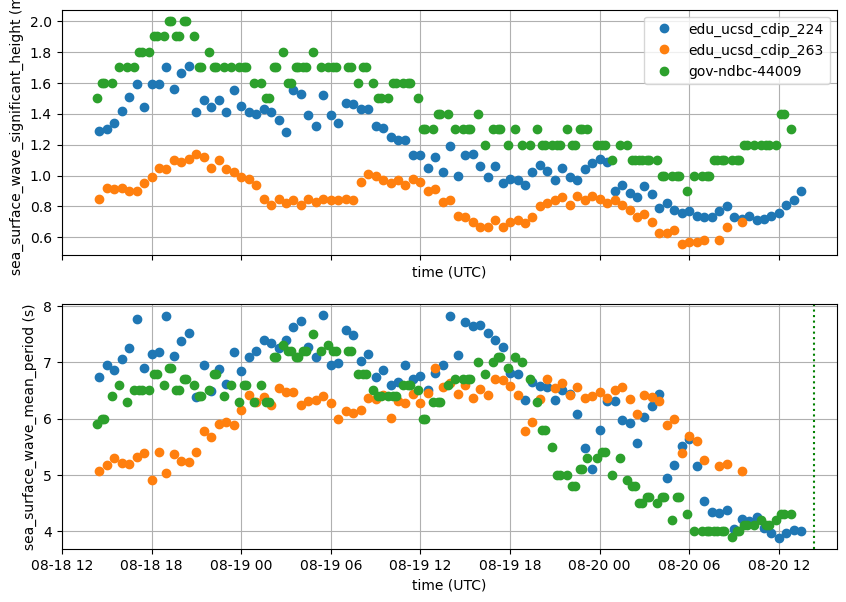

In [21]:
%%time
import matplotlib.dates as dates
import datetime
import pytz

def station_scatter(df, station, ax):
    ax[0].plot_date(dates.date2num(df["time (UTC)"]), df["sea_surface_wave_significant_height (m)"], 
                 xdate=True, 
                 tz='UTC', 
                 label=station)#, s=10, alpha=0.25)
    
    ax[1].plot_date(dates.date2num(df["time (UTC)"]), df["sea_surface_wave_mean_period (s)"], 
                 xdate=True, 
                 tz='UTC', 
                 label=station)#, s=10, alpha=0.25)


fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(10, 7), sharex=True)
ax[0].set_ylabel("sea_surface_wave_significant_height (m)")
ax[0].set_xlabel("time (UTC)")
ax[0].grid(True)
ax[1].set_ylabel("sea_surface_wave_mean_period (s)")
ax[1].set_xlabel("time (UTC)")
ax[1].grid(True)


for station, df in dfs.items():
    station_scatter(df, station, ax)

#ax.axis([5.5, 30, 30, 38])
ax[0].legend()
plt.axvline(datetime.datetime.now(pytz.timezone('UTC')), color='green', linestyle=":")

# Overlay models with in-situ observations

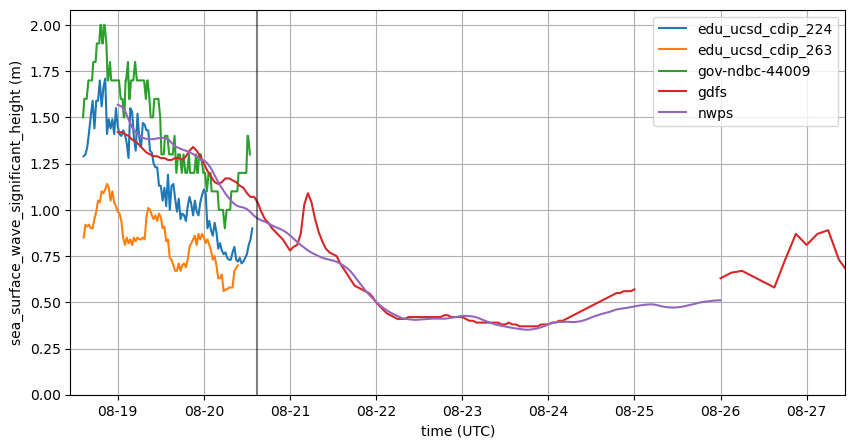

In [30]:
import matplotlib.dates as dates
import datetime
import pytz

dfs['gdfs'] = df_out[['time','Significant_height_of_combined_wind_waves_and_swell_surface_gfs']].copy()
dfs['nwps'] = df_out[['time','Significant_height_of_combined_wind_waves_and_swell_surface_nwps']].copy()

dfs['gdfs'].rename(columns={'Significant_height_of_combined_wind_waves_and_swell_surface_gfs':'sea_surface_wave_significant_height (m)',
                   'time': 'time (UTC)'}, inplace=True)
dfs['nwps'].rename(columns={'Significant_height_of_combined_wind_waves_and_swell_surface_nwps':'sea_surface_wave_significant_height (m)',
                   'time': 'time (UTC)'}, inplace=True)

dfs.keys()

def station_scatter(df, station, ax):
    ax.plot(dates.date2num(df["time (UTC)"]), df["sea_surface_wave_significant_height (m)"], 
                 #xdate=True, 
                 #tz='UTC', 
                 label=station,
                 linestyle='-',
                markersize=2)#, s=10, alpha=0.25)


fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10, 5))
ax.set_ylabel("sea_surface_wave_significant_height (m)")
ax.set_xlabel("time (UTC)")
ax.grid(True)


for station, df in dfs.items():
    station_scatter(df, station, ax)
    
# ax.plot_date(dates.date2num(df_out['time']),df_out['Significant_height_of_combined_wind_waves_and_swell_surface_nwps'], 
#              label='nwps',
#              tz='UTC',
#              markersize=1,
#              linestyle=':')
# ax.plot_date(dates.date2num(df_out['time']),df_out['Significant_height_of_combined_wind_waves_and_swell_surface_gfs'], 
#              label='gfs',
#              tz='UTC',
#              markersize=1,
#              linestyle=':')


ax.legend()
plt.axvline(datetime.datetime.now(pytz.timezone('UTC')), color='black', linestyle="-",alpha=0.5)

xmin = datetime.datetime.today()-datetime.timedelta(days=2)
xmax = datetime.datetime.today()+datetime.timedelta(days=7)

# set limits
ax.set_xlim( [xmin, xmax] )

#ymax = df_out.loc[(df_out['time']>xmin) & (df_out['time']<xmax),['Significant_height_of_combined_wind_waves_and_swell_surface_gfs','Significant_height_of_combined_wind_waves_and_swell_surface_nwps']].max().max()
#ymin = df_out.loc[(df_out['time']>xmin) & (df_out['time']<xmax),['Significant_height_of_combined_wind_waves_and_swell_surface_gfs','Significant_height_of_combined_wind_waves_and_swell_surface_nwps']].min().min()

ax.set_ylim(bottom=0)

ax.xaxis.set_major_formatter(
    dates.DateFormatter('%m-%d'))